# **01 - Exploratory Data Analysis**

En Xepelin estamos desarrollando un nuevo producto para las pymes de latinoamérica, y tu objetivo como miembro del equipo de Data es analizar los datos transaccionales disponible y generar un modelo que permita predecir cuánto dinero se pagará a través de este producto y cuanto se financiará por Xepelin.

En esta notebook se realiza un breve EDA para el entendimiento de variables del dataset y posterior desarrolo del modelo.

## 0 - Dependencies


In [ ]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.style.use('bmh')

import seaborn as sns
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## 1 - Data

### Datos disponibles


1.   **PayerId**	Id de la empresa que va a realizar el pago
2.   **ReceiverId**	Id de la empresa que recibe el pago
3.   **invoiceId**	Id de la factura pagada
4. **paidAt**		Fecha de pago
5. **amount**	Monto de la factura pagada
6. **amountfinancedByXepelin**	Monto de la factura que Xepelin financió al pagador para realizar la transacción
7. **Status**	Estado de cada transacción Pagada, Procesando, Fallida.

En este punto se realizará una pequeña exploración de las features para el entendimiento del dataset, con el fin de poder dirigir el EDA.

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PayerId                  1200 non-null   int64  
 1   ReceiverId               1200 non-null   int64  
 2   invoiceId                1200 non-null   int64  
 3   paidAt                   892 non-null    object 
 4   amount                   1200 non-null   float64
 5   amountfinancedByXepelin  1200 non-null   float64
 6   status                   1200 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 65.8+ KB


In [ ]:
df.describe(include=['float'])

,amount,amountfinancedByXepelin
count,"1,200.00","1,200.00"
mean,"27,852.17","17,493.03"
std,"141,489.87","122,901.58"
min,58.16,0.00
25%,"1,251.81",0.00
50%,"1,490.46",0.00
75%,"4,120.86",0.00
max,"3,370,741.92","3,370,741.92"


### paidAt


In [ ]:
#Parsing to datetime format
df['paidAt']=pd.to_datetime(df['paidAt'])
df['month'] = df['paidAt'].dt.month

### PayerId

In [ ]:
print('Cantidad de empresas emisoras en la plataforma', df.PayerId.nunique())

Cantidad de empresas emisoras en la plataforma 200


### ReceiverId

In [ ]:
print('Cantidad de empresas emisoras en la plataforma', df.ReceiverId.nunique())

Cantidad de empresas emisoras en la plataforma 77


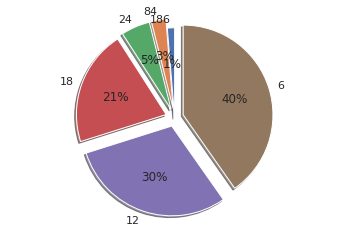

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(df.ReceiverId.value_counts().unique())
sizes = list(df.ReceiverId.value_counts().value_counts(ascending=True))
explode = (0, 0.1, 0.1, 0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode ,labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

De las 77 empresas hay 40% ha recibido al menos 6 veces pago a través de la plataforma.

### InvoiceId

Id de orden en plataforma, solo metadata.

Chequeo de que es único x operación 

In [ ]:
df.invoiceId.nunique()

1200

### **Status**

In [ ]:
df.status.value_counts()

PAID          892
PROCESSING    269
FAILED         39
Name: status, dtype: int64

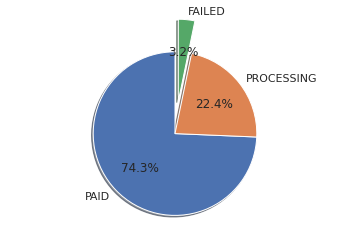

In [ ]:
#Status piechart
labels = list(df.status.value_counts().index)
sizes = list(df.status.value_counts().values)
explode = (0, 0, 0.4)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Esto impacta directamente a la columna de paidAt dado que si una operación está en proceso aún no se ha efectuado una fecha de pago


### amountfinancedByXepelin

In [ ]:
xep_count_n=df[df.amountfinancedByXepelin == 0].amountfinancedByXepelin.count()
print(f'Xepelin no ha financiado {xep_count_n} operaciones')
print(f'Equivale al {round(xep_count_n/df.shape[0],2)*100}% de las operaciones')


Xepelin no ha financiado 914 operaciones
Equivale al 76.0% de las operaciones


In [ ]:
xep_count=df[df.amountfinancedByXepelin > 0].amountfinancedByXepelin.count()
print(f'Xepelin ha financiado {xep_count} operaciones')
print(f'Equivale al {round(xep_count/df.shape[0],2)*100}% de las operaciones')

Xepelin ha financiado 286 operaciones
Equivale al 24.0% de las operaciones


In [ ]:
#Porcentaje financiado por Xepelin por operación
df['XepelinPercentage'] = round(df['amountfinancedByXepelin']/df['amount']*100,2)

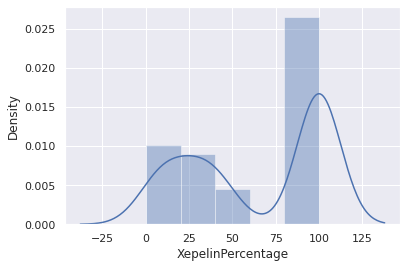

In [ ]:
sns.distplot(df[df.amountfinancedByXepelin > 0].XepelinPercentage )

In [ ]:
# Media financiada por Xepelin
round(df[df.amountfinancedByXepelin > 0].XepelinPercentage.mean(),2)

64.31

De todas las operaciones que financia Xepelin, suele financiar el 64.3% del total

### Conclusiones Data

1 - La ventana temporal del dataset empieza el 8 de  Febrero 2021 y termina el 30 de  Septiembre 2021.


2 - 200 empresas utilizan la plataforma de Xepelin a modo de emisión.

3 - 77 empresas reciben pagos a través de la misma plataforma.

4 - Todas las instancias pertenecen a una única operación (no hay duplicados)

5 - Fecha de pago efectuado unicamente para operaciones de status 'PAID', esto impacta a las instancias que podemos usar para el modelo. Es decir, solo podemos usar 74,3% del dataset para modelos de series de tiempo.

6 - Del total de operaciones 24% son financiadas (completa o parcialmente) por Xepelin. Independiente de si se efectuó o no la operación. 


## 2 - EDA

Aca voy a querer saber lo siguiente:

1- Distribución de emisores. Cuantos de ellos eligen financiación por Xepelin? Que tán recurrente es la elección? ¿Cuantos de ellos tienen operaciones fallidas?

2- Distribución de receptores. Cuantos han recibido pagos financiados por Xepelin?

3 - Montos sobre la plataforma. Caudal mensual sobre Xepelin. Financiación por Xepelin. Caudal mensual financiado.



Creo df para operaciones financiadas por Xepelin.

In [ ]:
# DataFrame únicamente con instancias financiadas por Xepelin
xep = df[df.amountfinancedByXepelin > 0]
#DataFrame con instancias que no fueron financiadas por Xepelin
nxep = df[df.amountfinancedByXepelin == 0]

### **A - Distribucón de emisores**

Cantidad de empresas emisoras en la plataforma 200
Media de emisiones por empresa 6.0
Mediana de emisiones por empresa 6.0
Desviación de emisiones por empresa 2.29


Text(0, 0.5, 'Cantidad de clientes')

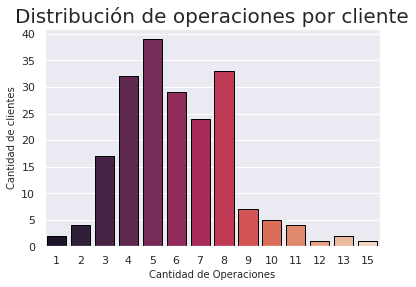

In [ ]:
print(f'Cantidad de empresas emisoras en la plataforma {df.PayerId.nunique()}')
print('Media de emisiones por empresa', df.PayerId.value_counts().mean())
print('Mediana de emisiones por empresa', df.PayerId.value_counts().median())
print('Desviación de emisiones por empresa', round(df.PayerId.value_counts().std(),2))
sns.countplot(df.PayerId.value_counts(),palette='rocket',edgecolor='black')
plt.title('Distribución de operaciones por cliente',fontsize=20)
plt.xlabel('Cantidad de Operaciones', fontsize=10)
plt.ylabel('Cantidad de clientes', fontsize=10)

Cantidad de empresas emisoras con financiación en la plataforma 150


Text(0, 0.5, 'Cantidad de clientes')

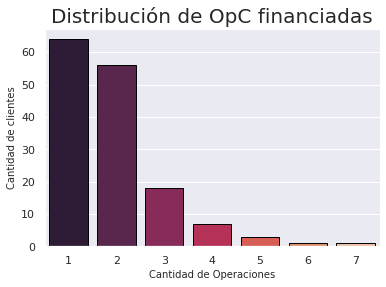

In [ ]:
print(f'Cantidad de empresas emisoras con financiación en la plataforma {xep.PayerId.nunique()}')
sns.countplot(xep.PayerId.value_counts(),palette='rocket',edgecolor='black')
plt.title('Distribución de OpC financiadas',fontsize=20)
plt.xlabel('Cantidad de Operaciones', fontsize=10)
plt.ylabel('Cantidad de clientes', fontsize=10)

¿Qué tan recurrente es la elección?
Del total de operaciones financiadas, que porcentaje lo hace más de dos veces? 

In [ ]:
# Nos quedamos con los clientes que lo hacen mas de una vez
recurrencia = xep.groupby(['PayerId'], as_index = True).invoiceId.agg(['count']).sort_values(by='count',
                                                                               ascending = False)

recurrencia = recurrencia[recurrencia['count']>=2]

In [ ]:
eng = round(recurrencia.index.nunique()/xep.PayerId.nunique()*100,2)
print(f'{eng}% de los clientes que operaron con financión lo vuelven a hacer')

57.33% de los clientes que operaron con financión lo vuelven a hacer


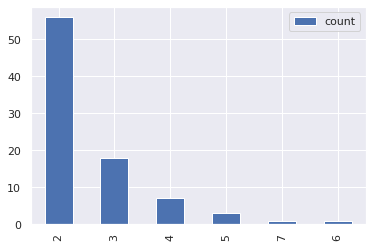

In [ ]:
recurrencia['count'].value_counts().to_frame().plot(kind='bar')

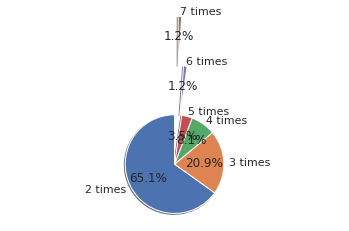

In [ ]:
#Status piechart
labels = ['2 times', '3 times', '4 times', '5 times', '6 times', '7 times']
sizes = list(recurrencia.value_counts().values)
explode = (0, 0,0,0,1, 2)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

¿Cuantos clientes tienen operaciones fallidas? 

In [ ]:
df[df['status']=='FAILED'].PayerId.nunique() is i

36

### **B - Distribución de receptores**

Cantidad de empresas receptoras en la plataforma 77
Media de recepciones por empresa 15.58
Mediana de recepciones por empresa 12.0
Desviación de recepciones por empresa 23.49


Text(0, 0.5, 'Cantidad de receptores')

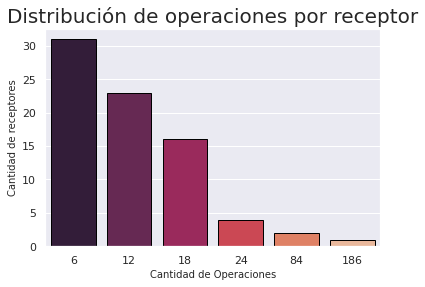

In [ ]:
print('Cantidad de empresas receptoras en la plataforma', df.ReceiverId.nunique())
print('Media de recepciones por empresa', round(df.ReceiverId.value_counts().mean(),2))
print('Mediana de recepciones por empresa', df.ReceiverId.value_counts().median())
print('Desviación de recepciones por empresa', round(df.ReceiverId.value_counts().std(),2))
sns.countplot(df.ReceiverId.value_counts(),palette='rocket',edgecolor='black')
plt.title('Distribución de operaciones por receptor',fontsize=20)
plt.xlabel('Cantidad de Operaciones', fontsize=10)
plt.ylabel('Cantidad de receptores', fontsize=10)

Cantidad de empresas emisoras con financiación en la plataforma 70


Text(0, 0.5, 'Cantidad de receptores')

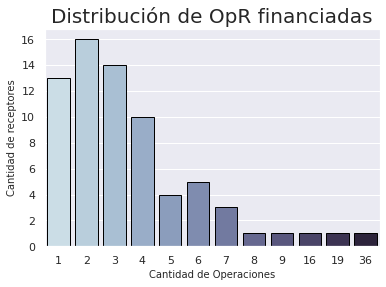

In [ ]:
print(f'Cantidad de empresas emisoras con financiación en la plataforma {xep.ReceiverId.nunique()}')
sns.countplot(xep.ReceiverId.value_counts(),palette='ch:s=.25,rot=-.25',edgecolor='black')
plt.title('Distribución de OpR financiadas',fontsize=20)
plt.xlabel('Cantidad de Operaciones', fontsize=10)
plt.ylabel('Cantidad de receptores', fontsize=10)

Conclusiones:

1 - Hubo una empresa que recibió 186 pagos a través de la plataforma.



### **C - Montos sobre plataforma. Montos financiados por Xepelin**

Monto total sobre plataforma mensualmente

In [ ]:
caudal_total = df[df['status'] == 'PAID'].groupby(['month']).amount.agg(['sum'])
caudal_total.rename(columns={'sum':'caudalTotal'},inplace=True)
caudal_total

,caudalTotal
month,
2.00,"34,425.18"
3.00,"269,826.65"
4.00,"753,946.49"
5.00,"7,250,723.28"
6.00,"7,132,982.75"
7.00,"5,765,920.25"
8.00,"5,044,795.41"
9.00,"1,178,392.90"


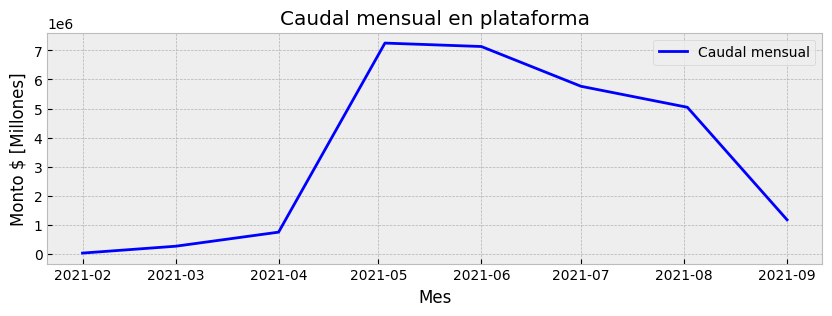

In [ ]:
aux = df[df['status'] == 'PAID']
aux.set_index('paidAt',inplace=True)

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(aux['amount'].resample('BMS').sum(), color = 'blue') 
ax.set_xlabel("Mes")
ax.set_ylabel("Monto $ [Millones]")
ax.set_title("Caudal mensual en plataforma")


ax.legend(["Caudal mensual"])

Monto total financiado por Xepelin

In [ ]:
caudal_financiado = xep[xep['status'] == 'PAID'].groupby(['month']).amountfinancedByXepelin.agg(['sum'])
caudal_financiado.rename(columns={'sum':'caudalFinanciadoTotal'},inplace=True)
caudal_financiado

,caudalFinanciadoTotal
month,
2.00,"10,520.15"
3.00,"119,352.51"
4.00,"592,831.07"
5.00,"5,187,188.89"
6.00,"4,518,034.66"
7.00,"2,344,379.98"
8.00,"3,057,870.38"
9.00,"714,735.77"


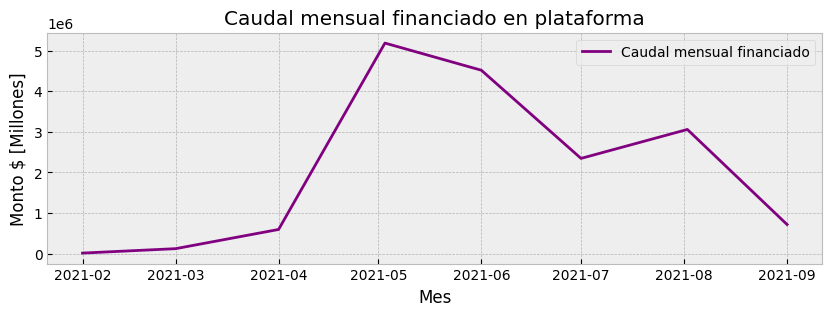

In [ ]:
aux2 = xep[xep['status'] == 'PAID']
aux2.set_index('paidAt',inplace=True)

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.style.use('bmh')

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(aux2['amountfinancedByXepelin'].resample('BMS').sum(), color = 'purple') 
ax.set_xlabel("Mes")
ax.set_ylabel("Monto $ [Millones]")
ax.set_title("Caudal mensual financiado en plataforma")


ax.legend(["Caudal mensual financiado"])

Montos totales y porcentaje financiado por Xepelin

In [ ]:
caudal_total['caudalFinanciadoTotal'] = caudal_financiado['caudalFinanciadoTotal']
caudal_total['porcentajeFinanciado'] = round(caudal_total['caudalFinanciadoTotal']/caudal_total['caudalTotal']*100,2)
caudal_total

,caudalTotal,caudalFinanciadoTotal,porcentajeFinanciado
month,,,
2.00,"34,425.18","10,520.15",30.56
3.00,"269,826.65","119,352.51",44.23
4.00,"753,946.49","592,831.07",78.63
5.00,"7,250,723.28","5,187,188.89",71.54
6.00,"7,132,982.75","4,518,034.66",63.34
7.00,"5,765,920.25","2,344,379.98",40.66
8.00,"5,044,795.41","3,057,870.38",60.61
9.00,"1,178,392.90","714,735.77",60.65


Serie de caudal total vs financiado

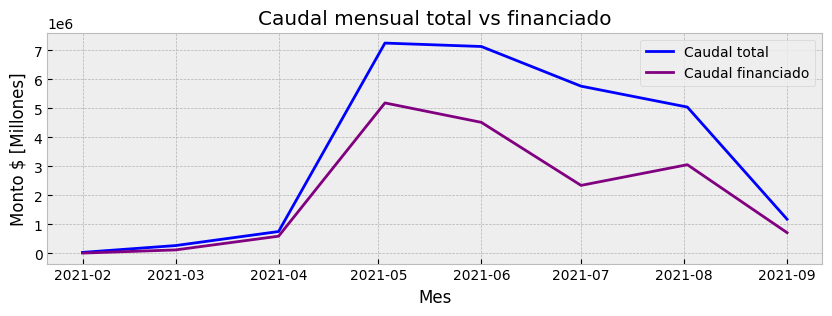

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(aux['amount'].resample('BMS').sum(), color = 'blue') 
ax.plot(aux2['amountfinancedByXepelin'].resample('BMS').sum(), color = 'purple') 
ax.set_xlabel("Mes")
ax.set_ylabel("Monto $ [Millones]")
ax.set_title("Caudal mensual total vs financiado")

ax.legend(["Caudal total","Caudal financiado"])